In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade geoplot
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
import pandas as pd


     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.8MB 304kB/s 
     |████████████████████████████████| 10.9MB 12.1MB/s 
     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=03558afda508d18653700a4498474b5e3173c0489c8c98854ec87a409d5138a9
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)
     |████████████████████████████████| 14.4MB 262kB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Could

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702077 sha256=a681fd6dbd6f5ef5dd051ddf6e429028a0d42ce9a9f02f5da5a3912da7f2b3e9
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
ERROR: geopandas 0.8.1 has requirement pyproj>=2.2.0, but you'll have pyproj 1.9.6 which is incompatible.
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [ ]:
!pip install -q pydot

In [ ]:
!pip install --upgrade geopandas

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.8.1)
  Using cached https://files.pythonhosted.org/packages/e5/c3/071e080230ac4b6c64f1a2e2f9161c9737a2bc7b683d2c90b024825000c0/pyproj-2.6.1.post1-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
from shapely.geometry import Point

from geopandas import GeoDataFrame

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder  # For categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
import pydot
import seaborn as sns
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/My Drive/NASA Challenge/FINAL NASA ALL/Global_Landslide_Catalog-Export.xlsx')


Mounted at /content/drive


In [ ]:
df.head(5)

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,2009-07-31 00:00:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,123.8978,10.3336


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                11033 non-null  object        
 1   source_link                10187 non-null  object        
 2   event_id                   11033 non-null  int64         
 3   event_date                 11033 non-null  datetime64[ns]
 4   event_time                 0 non-null      float64       
 5   event_title                11033 non-null  object        
 6   event_description          10171 non-null  object        
 7   location_description       10931 non-null  object        
 8   location_accuracy          11031 non-null  object        
 9   landslide_category         11032 non-null  object        
 10  landslide_trigger          11010 non-null  object        
 11  landslide_size             11024 non-null  object        
 12  land

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,event_time,11033,0.000000
1,notes,10716,2.873199
2,storm_name,10456,5.229765
3,photo_link,9537,13.559322
4,injury_count,5674,48.572464
5,admin_division_name,1637,85.162694
6,country_code,1564,85.824345
7,event_import_source,1563,85.833409
8,gazeteer_closest_point,1563,85.833409
9,admin_division_population,1562,85.842473


In [ ]:
df.shape # See how many data objects & attributes we have



(11033, 31)

In [ ]:
df.landslide_trigger.unique() # To get the distinct value for landslide_trigger column

array(['rain', 'downpour', 'monsoon', 'tropical_cyclone', 'unknown',
       'continuous_rain', 'dam_embankment_collapse',
       'no_apparent_trigger', nan, 'other', 'leaking_pipe',
       'construction', 'snowfall_snowmelt', 'mining', 'flooding',
       'earthquake', 'freeze_thaw', 'volcano', 'vibration'], dtype=object)

In [ ]:
dataframe=df

In [ ]:
del df['event_time'] # Deleting event_time column has there was no any data in that column.

In [ ]:
############################### DATA PREPROCESSING ###############################
# In this section I performed data preprocessing by removing noise, replacing NaN
# values, replacing NaN/empty values with the median of that attribute and dropping
# columns that wouldn't help our model train
##################################################################################
# Remove unwanted columns
df = df.drop(columns=['event_title',
                      'event_id','event_description',
                      'gazeteer_closest_point', 'country_code','gazeteer_distance','last_edited_date'])

In [ ]:
df = df.dropna(subset=['landslide_trigger'])
df=df.dropna(subset=["country_name"]) # remove null vrows of landslide_trigger

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,notes,9467,0.042234
1,storm_name,8925,5.764967
2,photo_link,8491,10.347376
3,injury_count,5588,40.998839
4,fatality_count,1339,85.862105
5,source_link,838,91.151937
6,location_description,86,99.091965
7,admin_division_name,75,99.208109
8,event_import_source,2,99.978883
9,created_date,1,99.989441


In [ ]:
# Remove unwanted columns
df = df.drop(columns=['notes',
                      'storm_name','photo_link'])

In [ ]:
# Replace NaN values in fatality & injury count with the medians
df['fatality_count'].fillna((df['fatality_count'].median()), inplace=True)
df['injury_count'].fillna((df['injury_count'].median()), inplace=True)

df.isnull().sum() # check for missing values in dataset

source_name                    0
source_link                  838
event_date                     0
location_description          86
location_accuracy              0
landslide_category             0
landslide_trigger              0
landslide_size                 0
landslide_setting              0
fatality_count                 0
injury_count                   0
event_import_source            2
event_import_id                0
country_name                   0
admin_division_name           75
admin_division_population      0
submitted_date                 1
created_date                   1
longitude                      0
latitude                       0
dtype: int64

In [ ]:
df.landslide_size.unique()

array(['large', 'small', 'medium', 'unknown', 'very_large'], dtype=object)

In [ ]:
#Delete attribute values that we don't want to classify:
df = df[df.landslide_size != "catastrophic"]
df = df[df.landslide_category != "unknown"]
df = df[df.landslide_category != "other"]
df = df[df.country_name != "NaN"]

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,source_link,834,91.098303
1,location_description,82,99.124773
2,admin_division_name,75,99.199488
3,created_date,1,99.989327
4,submitted_date,1,99.989327
5,event_import_source,1,99.989327
6,source_name,0,100.000000
7,admin_division_population,0,100.000000
8,country_name,0,100.000000
9,event_import_id,0,100.000000


In [ ]:
df.landslide_size.unique()

array(['large', 'small', 'medium', 'unknown', 'very_large'], dtype=object)

In [ ]:
 
df["landslide_size"].fillna("small", inplace = True)

In [ ]:
df = df.dropna(subset=['location_description']) 

In [ ]:
del df['landslide_setting']
del df['submitted_date']
del df['created_date']
# deleting redundant column as eventdate covers

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,source_link,833,91.030473
1,admin_division_name,74,99.203187
2,event_import_source,1,99.989232
3,source_name,0,100.000000
4,admin_division_population,0,100.000000
5,country_name,0,100.000000
6,event_import_id,0,100.000000
7,injury_count,0,100.000000
8,fatality_count,0,100.000000
9,landslide_size,0,100.000000


In [ ]:
df["admin_division_name"].fillna("NoDIVISION", inplace = True)
df['admin_division_population'].fillna((df['admin_division_population'].median()), inplace=True)
df["event_import_source"].fillna("ABCSource", inplace = True)
df['event_import_id'].fillna((df['event_import_id'].median()), inplace=True)
df["source_link"].fillna("ABCLink", inplace = True)
df["location_accuracy"].fillna("1km", inplace = True)


downpour                   5847
rain                       1872
continuous_rain             542
tropical_cyclone            535
monsoon                     121
earthquake                   71
snowfall_snowmelt            70
mining                       66
construction                 49
flooding                     47
freeze_thaw                  26
no_apparent_trigger          17
other                        15
dam_embankment_collapse       9
Name: landslide_trigger, dtype: int64

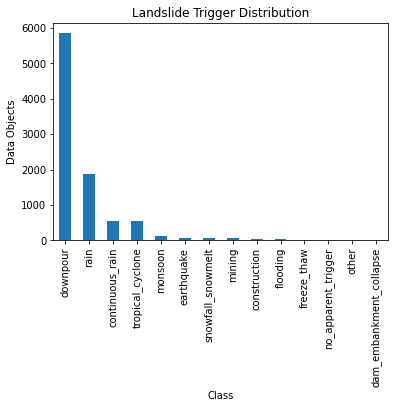

In [ ]:
# Print graph showing imbalanced data:
# Changing into approriate integer
df["landslide_trigger"].replace({"unknown": "downpour"}, inplace=True)
pd.value_counts(df['landslide_trigger']).plot.bar()
plt.title('Landslide Trigger Distribution')
plt.xlabel('Class')
plt.ylabel('Data Objects')
df['landslide_trigger'].value_counts()

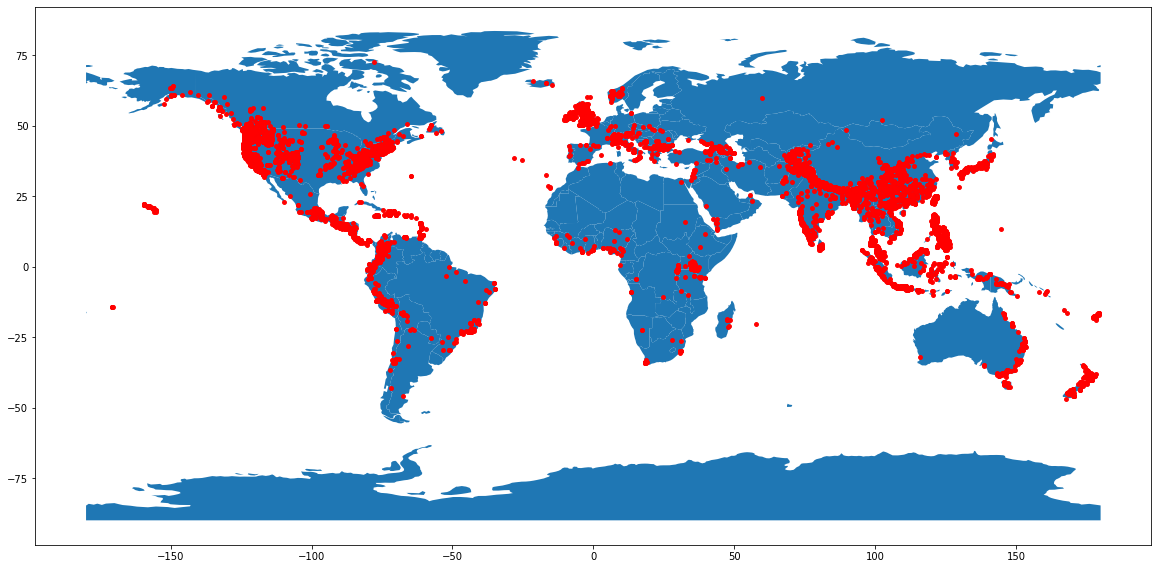

In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 10)), marker='o', color='red', markersize=15);

In [ ]:
# Make sure all categorical data is string value only

df['landslide_category'] = df['landslide_category'].astype(str) 
df['country_name'] = df['country_name'].astype(str) #make sure all country name values are strings

In [ ]:
# Label Encode our categorical data with dummy variables
#df = pd.get_dummies(df, prefix=['country_name','landslide_category','landslide_size'], 
 #                   columns=['country_name','landslide_category','landslide_size'])

In [ ]:
df['country_name'].nunique()

141

In [ ]:
df['country_name'].value_counts()

United States    2948
India            1250
Philippines       665
Nepal             477
China             419
                 ... 
Albania             1
Burundi             1
Morocco             1
Uzbekistan          1
Oman                1
Name: country_name, Length: 141, dtype: int64

In [ ]:
count_countrywise = df['country_name'].value_counts()

In [ ]:
country_df = pd.DataFrame(count_countrywise)

In [ ]:
country_df

,country_name
United States,2948
India,1250
Philippines,665
Nepal,477
China,419
...,...
Albania,1
Burundi,1
Morocco,1
Uzbekistan,1


In [ ]:
df['Country_Name']=df['country_name']
df['Country_Name']

0                China
1        United States
2                 Peru
3                Nepal
4          Philippines
             ...      
9939       Philippines
10005    United States
10019    United States
10071        Indonesia
10086        Indonesia
Name: Country_Name, Length: 9287, dtype: object

In [ ]:
country_df.rename(columns = {'country_name': 'Landslide_Count'}, inplace = True)

In [ ]:
top10_country= country_df.sort_values('Landslide_Count', ascending=False).head(10)

In [ ]:
df.head()

,source_name,source_link,event_date,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,Country_Name
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,2008-08-01 00:00:00,"Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,11.0,0.0,glc,684.0,China,Shaanxi,0.0,107.4500,32.5625,POINT (107.45000 32.56250),China
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,2009-01-02 02:00:00,"Lake Oswego, Oregon",5km,mudslide,downpour,small,0.0,0.0,glc,956.0,United States,Oregon,36619.0,-122.6630,45.4200,POINT (-122.66300 45.42000),United States
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,2007-01-19 00:00:00,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,10.0,0.0,glc,973.0,Peru,Junín,14708.0,-75.3587,-11.1295,POINT (-75.35870 -11.12950),Peru
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,2009-07-31 00:00:00,Dailekh district,unknown,landslide,monsoon,medium,1.0,0.0,glc,1067.0,Nepal,Mid Western,20908.0,81.7080,28.8378,POINT (81.70800 28.83780),Nepal
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2010-10-16 12:00:00,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,0.0,0.0,glc,2603.0,Philippines,Central Visayas,798634.0,123.8978,10.3336,POINT (123.89780 10.33360),Philippines


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9287 entries, 0 to 10086
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                9287 non-null   object        
 1   source_link                9287 non-null   object        
 2   event_date                 9287 non-null   datetime64[ns]
 3   location_description       9287 non-null   object        
 4   location_accuracy          9287 non-null   object        
 5   landslide_category         9287 non-null   object        
 6   landslide_trigger          9287 non-null   object        
 7   landslide_size             9287 non-null   object        
 8   fatality_count             9287 non-null   float64       
 9   injury_count               9287 non-null   float64       
 10  event_import_source        9287 non-null   object        
 11  event_import_id            9287 non-null   float64       
 12  count

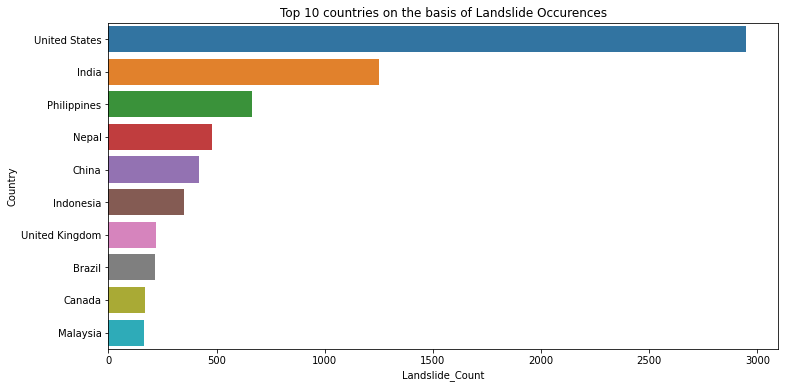

In [ ]:
plt.figure(figsize=(12,6))
plt.ylabel('Country')
#plt.xlabel('Number of Landslide Cases')
plt.title('Top 10 countries on the basis of Landslide Occurences')
sns.barplot(top10_country['Landslide_Count'], top10_country.index);

# ** Above Graph Shows the Top 10 Countries on the basis of Landslide Occurence** 

### Landslide Count of TOP 10 Countries 

In [ ]:
count_countrywise.head(10)

United States     2948
India             1250
Philippines        665
Nepal              477
China              419
Indonesia          349
United Kingdom     221
Brazil             214
Canada             167
Malaysia           166
Name: country_name, dtype: int64

In [ ]:
cols = ['landslide_size','landslide_category','country_name','landslide_trigger','fatality_count','injury_count','event_date']
df1 =pd.DataFrame(df, columns = cols)

In [ ]:
df1.sample(5)

,landslide_size,landslide_category,country_name,landslide_trigger,fatality_count,injury_count,event_date
9173,medium,mudslide,United States,downpour,0.0,0.0,2016-10-16 17:00:00
5369,small,landslide,India,continuous_rain,8.0,1.0,2014-09-23 03:00:00
715,medium,rock_fall,Canada,rain,0.0,0.0,2014-12-07 09:00:00
8285,medium,landslide,United States,rain,0.0,0.0,2012-01-19 15:00:00
5620,small,complex,United States,downpour,0.0,0.0,2010-01-21 22:00:00


In [ ]:
df.head()

,source_name,source_link,event_date,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,Country_Name
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,2008-08-01 00:00:00,"Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,11.0,0.0,glc,684.0,China,Shaanxi,0.0,107.4500,32.5625,POINT (107.45000 32.56250),China
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,2009-01-02 02:00:00,"Lake Oswego, Oregon",5km,mudslide,downpour,small,0.0,0.0,glc,956.0,United States,Oregon,36619.0,-122.6630,45.4200,POINT (-122.66300 45.42000),United States
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,2007-01-19 00:00:00,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,10.0,0.0,glc,973.0,Peru,Junín,14708.0,-75.3587,-11.1295,POINT (-75.35870 -11.12950),Peru
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,2009-07-31 00:00:00,Dailekh district,unknown,landslide,monsoon,medium,1.0,0.0,glc,1067.0,Nepal,Mid Western,20908.0,81.7080,28.8378,POINT (81.70800 28.83780),Nepal
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2010-10-16 12:00:00,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,0.0,0.0,glc,2603.0,Philippines,Central Visayas,798634.0,123.8978,10.3336,POINT (123.89780 10.33360),Philippines


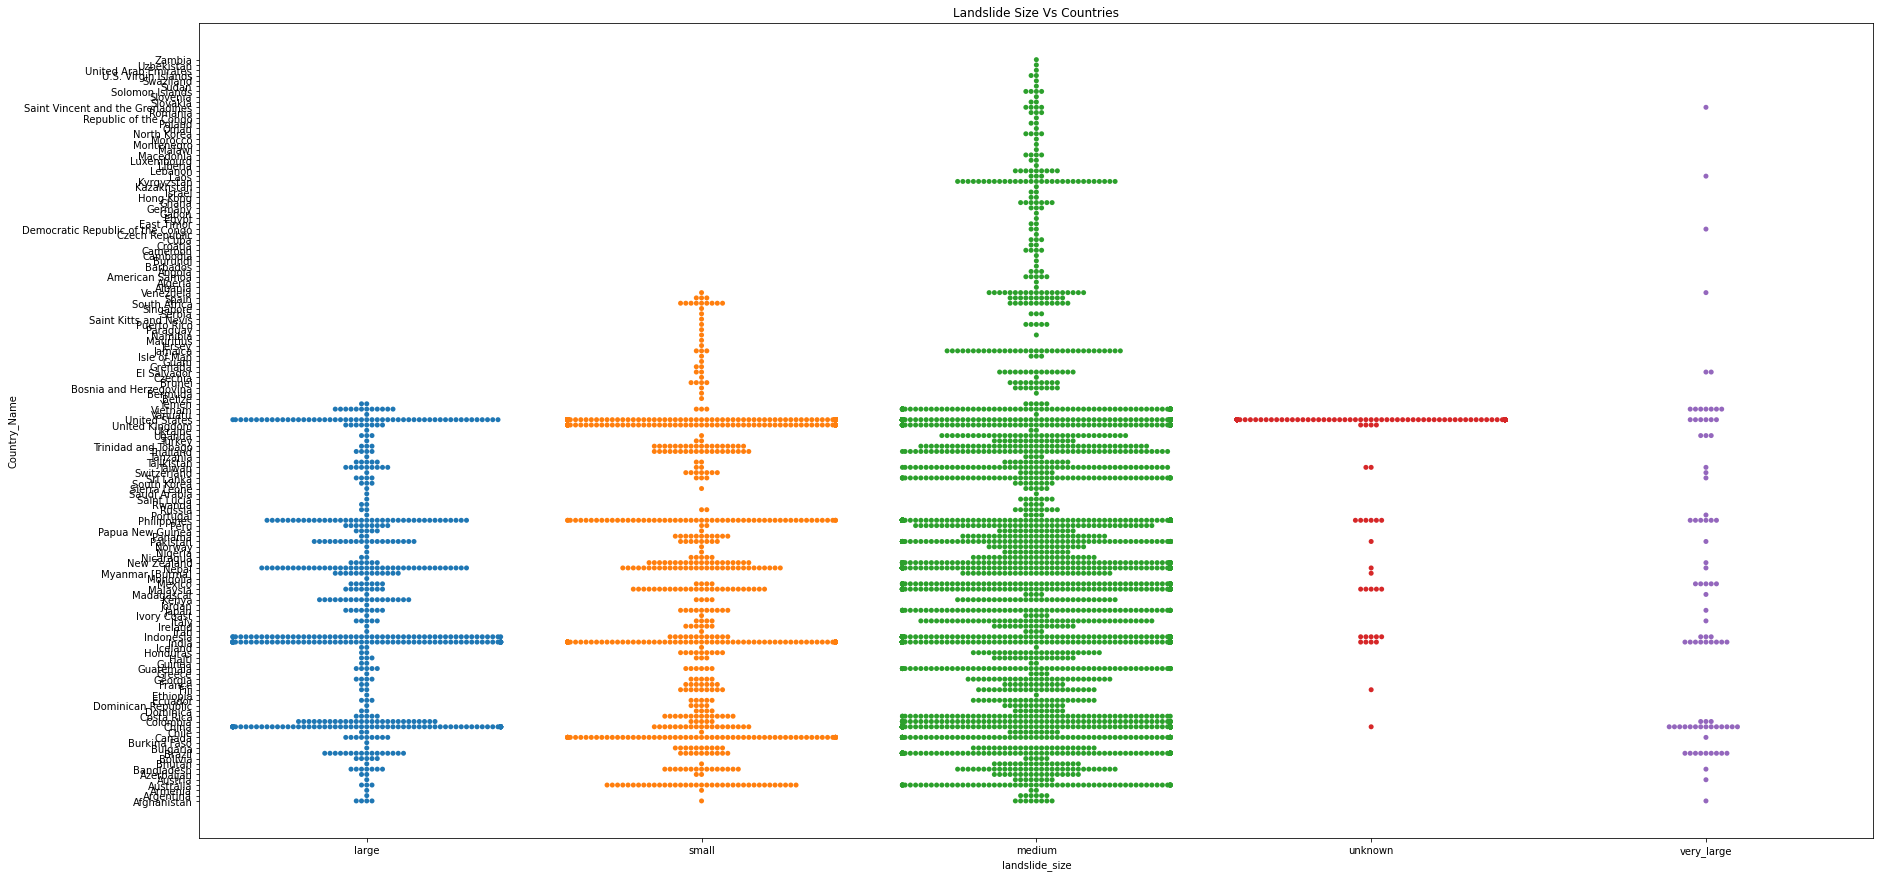

In [ ]:
plt.figure(figsize=(30,15))
plt.title('Landslide Size Vs Countries')
sns.swarmplot(df['landslide_size'], df['Country_Name']);

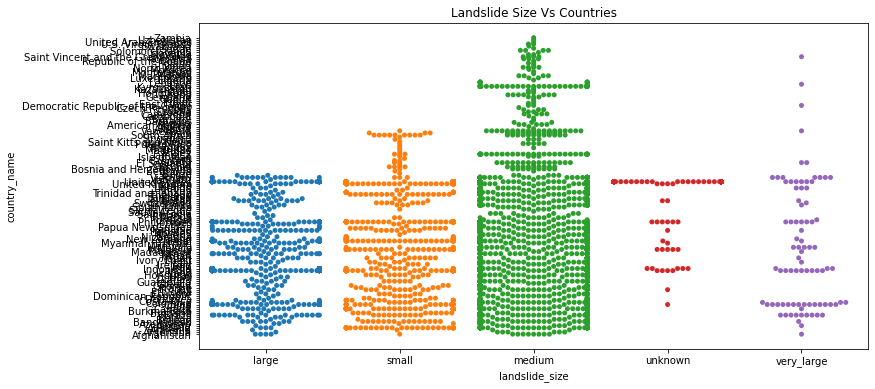

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Landslide Size Vs Countries')
sns.swarmplot(df1['landslide_size'], df1['country_name']);

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,source_name,0,100.0
1,latitude,0,100.0
2,longitude,0,100.0
3,admin_division_population,0,100.0
4,admin_division_name,0,100.0
5,country_name,0,100.0
6,event_import_id,0,100.0
7,event_import_source,0,100.0
8,geometry,0,100.0
9,injury_count,0,100.0


In [ ]:
df['landslide_trigger']

0                    rain
1                downpour
2                downpour
3                 monsoon
4        tropical_cyclone
               ...       
9939     tropical_cyclone
10005            downpour
10019            downpour
10071             monsoon
10086             monsoon
Name: landslide_trigger, Length: 9287, dtype: object

In [ ]:
# Label Encode our trigger values into numbers
df["landslide_trigger"] = df["landslide_trigger"].astype('category')
df["landslide_trigger"] = df["landslide_trigger"].cat.codes
df.head(5)

,source_name,source_link,event_date,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,Country_Name
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,2008-08-01 00:00:00,"Sigou Village, Loufan County, Shanxi Province",unknown,landslide,11,large,11.0,0.0,glc,684.0,China,Shaanxi,0.0,107.4500,32.5625,POINT (107.45000 32.56250),China
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,2009-01-02 02:00:00,"Lake Oswego, Oregon",5km,mudslide,3,small,0.0,0.0,glc,956.0,United States,Oregon,36619.0,-122.6630,45.4200,POINT (-122.66300 45.42000),United States
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,2007-01-19 00:00:00,"San Ramon district, 195 miles northeast of the...",10km,landslide,3,large,10.0,0.0,glc,973.0,Peru,Junín,14708.0,-75.3587,-11.1295,POINT (-75.35870 -11.12950),Peru
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,2009-07-31 00:00:00,Dailekh district,unknown,landslide,8,medium,1.0,0.0,glc,1067.0,Nepal,Mid Western,20908.0,81.7080,28.8378,POINT (81.70800 28.83780),Nepal
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2010-10-16 12:00:00,sitio Bakilid in barangay Lahug,5km,landslide,13,medium,0.0,0.0,glc,2603.0,Philippines,Central Visayas,798634.0,123.8978,10.3336,POINT (123.89780 10.33360),Philippines


Here we changed landslide trigger value that was string into int : Keep Note 

---

**rain= 11 , downpour= 3 , monsoon = 8 , tropical_cyclone = 143,....**

In [ ]:
df.landslide_trigger.nunique()

14

In [ ]:
df['landslide_trigger'].unique()

array([11,  3,  8, 13,  1,  5,  7,  9, 12,  2,  4,  0, 10,  6], dtype=int8)

In [ ]:
df['location_accuracy'].unique()

array(['unknown', '5km', '10km', '25km', 'exact', '1km', '50km', '100km',
       '250km'], dtype=object)

In [ ]:
# Changing into approriate integer
df["location_accuracy"].replace({"unknown": "0", "5km": "5","10km":"10","25km":"25","exact":"0","1km":"1","50km":"50","250km":"250","100km":"100"}, inplace=True)

In [ ]:
df["location_accuracy"]

0         0
1         5
2        10
3         0
4         5
         ..
9939     10
10005     0
10019     1
10071     5
10086     5
Name: location_accuracy, Length: 9287, dtype: object

In [ ]:
# Label Encode our divisioname values into numbers
df["admin_division_name"] = df["admin_division_name"].astype('category')
df["admin_division_name"] = df["admin_division_name"].cat.codes


# Label Encode our event_import_sourcer values into numbers
df["event_import_source"] = df["event_import_source"].astype('category')
df["event_import_source"] = df["event_import_source"].cat.codes


# Label Encode our source_link values into numbers
df["source_link"] = df["source_link"].astype('category')
df["source_link"] = df["source_link"].cat.codes


# Label Encode our Location Description values into numbers
df["location_description"] = df["location_description"].astype('category')
df["location_description"] = df["location_description"].cat.codes
df.head(5)

# Label Encode our SourceName values into numbers
df["source_name"] = df["source_name"].astype('category')
df["source_name"] = df["source_name"].cat.codes

# Label Encode our Locationaccuracy values into numbers
df["location_accuracy"] = df["location_accuracy"].astype('category')
df["location_accuracy"] = df["location_accuracy"].cat.codes
df.head(5)

,source_name,source_link,event_date,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,Country_Name
0,72,6673,2008-08-01 00:00:00,6529,0,landslide,11,large,11.0,0.0,1,684.0,China,685,0.0,107.4500,32.5625,POINT (107.45000 32.56250),China
1,1048,4830,2009-01-02 02:00:00,3743,6,mudslide,3,small,0.0,0.0,1,956.0,United States,552,36619.0,-122.6630,45.4200,POINT (-122.66300 45.42000),United States
2,215,6759,2007-01-19 00:00:00,6270,2,landslide,3,large,10.0,0.0,1,973.0,Peru,326,14708.0,-75.3587,-11.1295,POINT (-75.35870 -11.12950),Peru
3,1158,6678,2009-07-31 00:00:00,1688,0,landslide,8,medium,1.0,0.0,1,1067.0,Nepal,453,20908.0,81.7080,28.8378,POINT (81.70800 28.83780),Nepal
4,1335,4920,2010-10-16 12:00:00,8658,6,landslide,13,medium,0.0,0.0,1,2603.0,Philippines,128,798634.0,123.8978,10.3336,POINT (123.89780 10.33360),Philippines


In [ ]:
df['location_description'].value_counts()

1960    14
2591    11
5194     9
5083     7
7433     7
        ..
6646     1
4599     1
8697     1
2556     1
0        1
Name: location_description, Length: 8841, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9287 entries, 0 to 10086
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                9287 non-null   int16         
 1   source_link                9287 non-null   int16         
 2   event_date                 9287 non-null   datetime64[ns]
 3   location_description       9287 non-null   int16         
 4   location_accuracy          9287 non-null   int8          
 5   landslide_category         9287 non-null   object        
 6   landslide_trigger          9287 non-null   int8          
 7   landslide_size             9287 non-null   object        
 8   fatality_count             9287 non-null   float64       
 9   injury_count               9287 non-null   float64       
 10  event_import_source        9287 non-null   int8          
 11  event_import_id            9287 non-null   float64       
 12  count

In [ ]:
df['event_year'] = df['event_date'].dt.year
df['event_month'] = df['event_date'].dt.month
df['event_week'] = df['event_date'].dt.week
df['event_day'] = df['event_date'].dt.day
#df['event_date_hour'] = df['event_date'].dt.hour
#df['event_date_minute'] = df['event_date'].dt.minute
#df['event_Date'] = df['event_date'].dt.date'''

In [ ]:
import datetime as dt

In [ ]:
df['event_year']

0        2008
1        2009
2        2007
3        2009
4        2010
         ... 
9939     2014
10005    2011
10019    2011
10071    2013
10086    2013
Name: event_year, Length: 9287, dtype: int64

In [ ]:
df_by_year = df.sort_values('event_year');

In [ ]:
df_by_year = df_by_year.set_index('event_year')

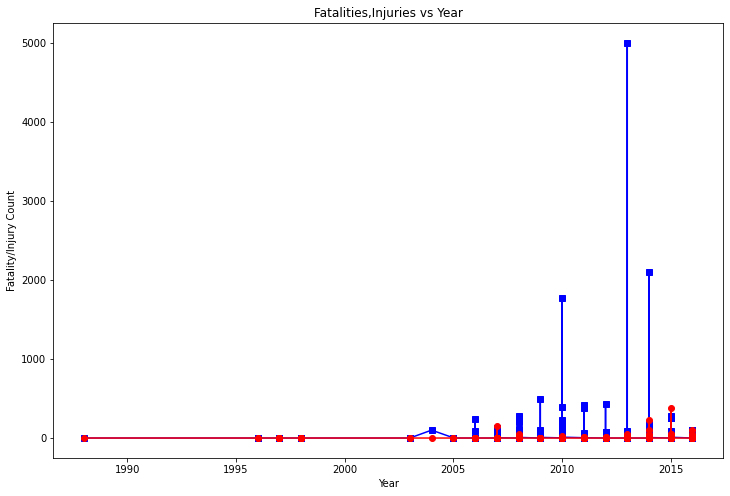

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Fatalities,Injuries vs Year')
plt.xlabel('Year')
plt.ylabel('Fatality/Injury Count')
plt.plot( df_by_year.index, df_by_year['fatality_count'], 's-b')
plt.plot( df_by_year.index, df_by_year['injury_count'], 'o-r');


In [ ]:
df.sample(2)

,source_name,source_link,event_date,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,Country_Name,event_year,event_month,event_week,event_day
2124,1045,0,2013-11-07 18:09:00,7487,0,landslide,3,unknown,0.0,0.0,1,8433.0,United States,552,1744.0,-119.6313,44.5268,POINT (-119.63130 44.52680),United States,2013,11,45,7
9023,1045,0,2012-12-26 07:58:00,7417,0,landslide,3,unknown,0.0,0.0,1,8503.0,United States,552,1312.0,-123.9529,45.7413,POINT (-123.95290 45.74130),United States,2012,12,52,26


In [ ]:
#country vs fatality count
col1 = ['country_name','landslide_category', 'landslide_trigger','landslide_size','fatality_count', 'injury_count','admin_division_population','event_year' ]
df2 = pd.DataFrame(df, columns = col1)

In [ ]:
#country vs fatality count
CbyF = df2.groupby('country_name')[['fatality_count']].sum()
print(CbyF)

                fatality_count
country_name                  
Afghanistan             2287.0
Albania                    0.0
Algeria                    6.0
American Samoa             0.0
Angola                     0.0
...                        ...
Vanuatu                    3.0
Venezuela                 29.0
Vietnam                  375.0
Yemen                     65.0
Zambia                     9.0

[141 rows x 1 columns]


In [ ]:
Countrydeath_count = CbyF.sort_values('fatality_count', ascending = False).head(20)

### **The below list shows the 10 countries with maximum deaths**

In [ ]:
#Which countries have the maximum reported deaths?
Countrydeath_count.head(10)
#the below list shows the 10 countries with maximum deaths

,fatality_count
country_name,
India,7058.0
China,4930.0
Afghanistan,2287.0
Philippines,1839.0
Brazil,1743.0
Indonesia,1676.0
Nepal,1432.0
Guatemala,735.0
Pakistan,643.0


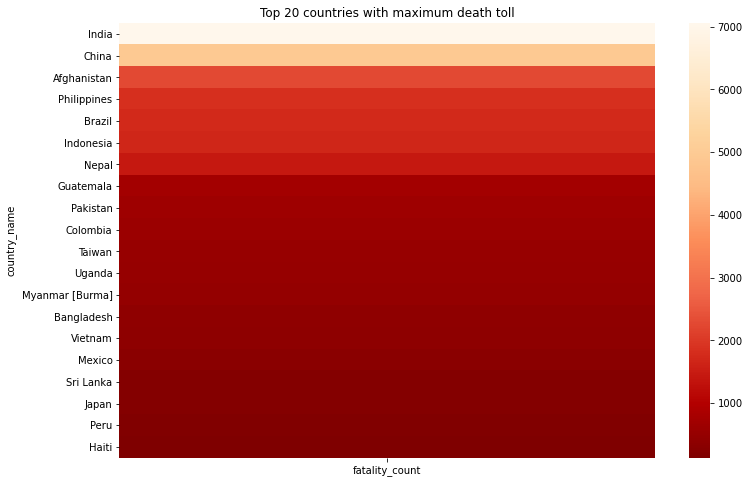

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 20 countries with maximum death toll')
sns.heatmap(Countrydeath_count, cmap = 'OrRd_r');

In [ ]:
#country vs injury_count 
CbyI = df2.groupby('country_name')[['injury_count']].sum()
print(CbyI)

                injury_count
country_name                
Afghanistan              0.0
Albania                  0.0
Algeria                  0.0
American Samoa           0.0
Angola                   0.0
...                      ...
Vanuatu                  0.0
Venezuela                1.0
Vietnam                 20.0
Yemen                   44.0
Zambia                   0.0

[141 rows x 1 columns]


In [ ]:
Countryinjury_count = CbyI.sort_values('injury_count', ascending = False).head(20)

#**MODEL** **BUILDING**

#**The list below shows the top 10 countries that had maximum injuries ** 

In [ ]:
Countryinjury_count.head(10)

,injury_count
country_name,
Guatemala,393.0
China,313.0
Peru,277.0
Nepal,257.0
Myanmar [Burma],228.0
India,215.0
Bangladesh,170.0
Indonesia,147.0
Philippines,138.0


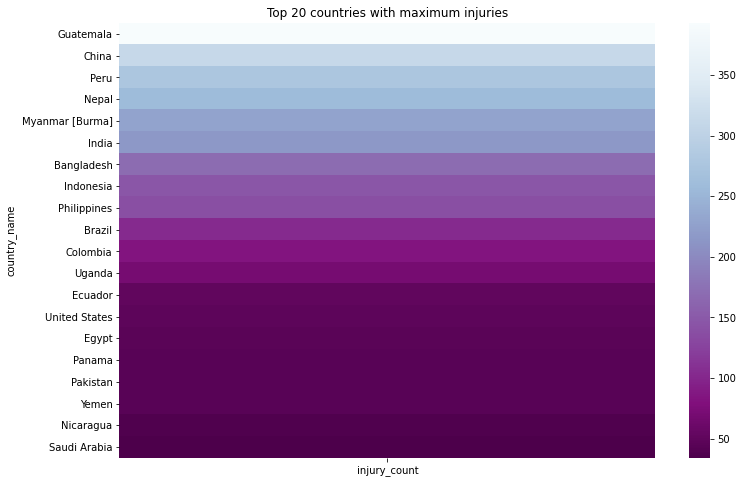

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 20 countries with maximum injuries')
sns.heatmap(Countryinjury_count, cmap = 'BuPu_r');

In [ ]:
dataframe.head()

,source_name,source_link,event_id,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,2009-07-31 00:00:00,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,2010-10-16 12:00:00,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,123.8978,10.3336


In [ ]:
df.head()

,source_name,source_link,event_date,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,Country_Name,event_year,event_month,event_week,event_day
0,72,6673,2008-08-01 00:00:00,6529,0,landslide,11,large,11.0,0.0,1,684.0,China,685,0.0,107.4500,32.5625,POINT (107.45000 32.56250),China,2008,8,31,1
1,1048,4830,2009-01-02 02:00:00,3743,6,mudslide,3,small,0.0,0.0,1,956.0,United States,552,36619.0,-122.6630,45.4200,POINT (-122.66300 45.42000),United States,2009,1,1,2
2,215,6759,2007-01-19 00:00:00,6270,2,landslide,3,large,10.0,0.0,1,973.0,Peru,326,14708.0,-75.3587,-11.1295,POINT (-75.35870 -11.12950),Peru,2007,1,3,19
3,1158,6678,2009-07-31 00:00:00,1688,0,landslide,8,medium,1.0,0.0,1,1067.0,Nepal,453,20908.0,81.7080,28.8378,POINT (81.70800 28.83780),Nepal,2009,7,31,31
4,1335,4920,2010-10-16 12:00:00,8658,6,landslide,13,medium,0.0,0.0,1,2603.0,Philippines,128,798634.0,123.8978,10.3336,POINT (123.89780 10.33360),Philippines,2010,10,41,16


In [ ]:
# Split our labels into their own array
#Here Our Target class :  landslide trigger 
Y = np.array(df['landslide_trigger'])  # values we want to predict

In [ ]:
Y

array([11,  3,  3, ...,  3,  8,  8], dtype=int8)

**# Target Class= landslide_trigger**

In [ ]:
# Remove the labels from the features, axis 1 refers to the col
X = df.drop('landslide_trigger',axis=1)

In [ ]:
df.columns

Index(['source_name', 'source_link', 'event_date', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'fatality_count', 'injury_count',
       'event_import_source', 'event_import_id', 'country_name',
       'admin_division_name', 'admin_division_population', 'longitude',
       'latitude', 'geometry', 'Country_Name', 'event_year', 'event_month',
       'event_week', 'event_day'],
      dtype='object')

In [ ]:
del df['country_name']

In [ ]:

df['event_date_hour'] = df['event_date'].dt.hour
df['event_date_minute'] = df['event_date'].dt.minute

In [ ]:
feature_list = list(df.columns)
feature_list

['source_name',
 'source_link',
 'event_date',
 'location_description',
 'location_accuracy',
 'landslide_category',
 'landslide_trigger',
 'landslide_size',
 'fatality_count',
 'injury_count',
 'event_import_source',
 'event_import_id',
 'admin_division_name',
 'admin_division_population',
 'longitude',
 'latitude',
 'geometry',
 'Country_Name',
 'event_year',
 'event_month',
 'event_week',
 'event_day',
 'event_date_hour',
 'event_date_minute']

In [ ]:
feature_list = list(df.columns)
feature_list

['source_name',
 'source_link',
 'event_date',
 'location_description',
 'location_accuracy',
 'landslide_category',
 'landslide_trigger',
 'landslide_size',
 'fatality_count',
 'injury_count',
 'event_import_source',
 'event_import_id',
 'admin_division_name',
 'admin_division_population',
 'longitude',
 'latitude',
 'geometry',
 'Country_Name',
 'event_year',
 'event_month',
 'event_week',
 'event_day',
 'event_date_hour',
 'event_date_minute']

In [ ]:
X=df

In [ ]:
df.dtypes

source_name                           int16
source_link                           int16
event_date                   datetime64[ns]
location_description                  int16
location_accuracy                      int8
landslide_category                   object
landslide_trigger                      int8
landslide_size                       object
fatality_count                      float64
injury_count                        float64
event_import_source                    int8
event_import_id                     float64
admin_division_name                   int16
admin_division_population           float64
longitude                           float64
latitude                            float64
geometry                           geometry
Country_Name                         object
event_year                            int64
event_month                           int64
event_week                            int64
event_day                             int64
event_date_hour                 

In [ ]:
#Converting float type to int 
df['injury_count'] = df['injury_count'].astype(int) 
df['latitude'] = df['latitude'].astype(int) 
df['longitude'] = df['longitude'].astype(int) 
df['fatality_count'] = df['fatality_count'].astype(int) 
df['event_import_id'] = df['event_import_id'].astype(int) 
df['admin_division_population'] = df['admin_division_population'].astype(int) 
df.dtypes

source_name                           int16
source_link                           int16
event_date                   datetime64[ns]
location_description                  int16
location_accuracy                      int8
landslide_category                   object
landslide_trigger                      int8
landslide_size                       object
fatality_count                        int64
injury_count                          int64
event_import_source                    int8
event_import_id                       int64
admin_division_name                   int16
admin_division_population             int64
longitude                             int64
latitude                              int64
geometry                           geometry
Country_Name                         object
event_year                            int64
event_month                           int64
event_week                            int64
event_day                             int64
event_date_hour                 

In [ ]:
del df['geometry']

In [ ]:
#Removing Redundant Column
del df['event_date'] 

In [ ]:
feature_list = list(df.columns)
feature_list

['source_name',
 'source_link',
 'location_description',
 'location_accuracy',
 'landslide_category',
 'landslide_trigger',
 'landslide_size',
 'fatality_count',
 'injury_count',
 'event_import_source',
 'event_import_id',
 'admin_division_name',
 'admin_division_population',
 'longitude',
 'latitude',
 'Country_Name',
 'event_year',
 'event_month',
 'event_week',
 'event_day',
 'event_date_hour',
 'event_date_minute']

In [ ]:
df.head()

,source_name,source_link,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,admin_division_name,admin_division_population,longitude,latitude,Country_Name,event_year,event_month,event_week,event_day,event_date_hour,event_date_minute
0,72,6673,6529,0,landslide,11,large,11,0,1,684,685,0,107,32,China,2008,8,31,1,0,0
1,1048,4830,3743,6,mudslide,3,small,0,0,1,956,552,36619,-122,45,United States,2009,1,1,2,2,0
2,215,6759,6270,2,landslide,3,large,10,0,1,973,326,14708,-75,-11,Peru,2007,1,3,19,0,0
3,1158,6678,1688,0,landslide,8,medium,1,0,1,1067,453,20908,81,28,Nepal,2009,7,31,31,0,0
4,1335,4920,8658,6,landslide,13,medium,0,0,1,2603,128,798634,123,10,Philippines,2010,10,41,16,12,0


In [ ]:
#For any graphs to be added creating duplicate dataframe
df2=df

In [ ]:
df.dtypes

source_name                   int16
source_link                   int16
location_description          int16
location_accuracy              int8
landslide_category           object
landslide_trigger              int8
landslide_size               object
fatality_count                int64
injury_count                  int64
event_import_source            int8
event_import_id               int64
admin_division_name           int16
admin_division_population     int64
longitude                     int64
latitude                      int64
Country_Name                 object
event_year                    int64
event_month                   int64
event_week                    int64
event_day                     int64
event_date_hour               int64
event_date_minute             int64
dtype: object

In [ ]:
# Label Encode our landslide_category values into numbers
df["landslide_category"] = df["landslide_category"].astype('category')
df["landslide_category"] = df["landslide_category"].cat.codes





# Label Encode our Country_Name  values into numbers
df["Country_Name"] = df["Country_Name"].astype('category')
df["Country_Name"] = df["Country_Name"].cat.codes




In [ ]:
# Label Encode our landslide_size values into numbers
df["landslide_size"] = df["landslide_size"].astype('category')
df["landslide_size"] = df["landslide_size"].cat.codes

In [ ]:
df.head()

,source_name,source_link,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,admin_division_name,admin_division_population,longitude,latitude,Country_Name,event_year,event_month,event_week,event_day,event_date_hour,event_date_minute
0,72,6673,6529,0,5,11,0,11,0,1,684,685,0,107,32,26,2008,8,31,1,0,0
1,1048,4830,3743,6,6,3,2,0,0,1,956,552,36619,-122,45,134,2009,1,1,2,2,0
2,215,6759,6270,2,5,3,0,10,0,1,973,326,14708,-75,-11,97,2007,1,3,19,0,0
3,1158,6678,1688,0,5,8,1,1,0,1,1067,453,20908,81,28,86,2009,7,31,31,0,0
4,1335,4920,8658,6,5,13,1,0,0,1,2603,128,798634,123,10,98,2010,10,41,16,12,0


In [ ]:
feature_list = list(df.columns)
feature_list

['source_name',
 'source_link',
 'location_description',
 'location_accuracy',
 'landslide_category',
 'landslide_trigger',
 'landslide_size',
 'fatality_count',
 'injury_count',
 'event_import_source',
 'event_import_id',
 'admin_division_name',
 'admin_division_population',
 'longitude',
 'latitude',
 'Country_Name',
 'event_year',
 'event_month',
 'event_week',
 'event_day',
 'event_date_hour',
 'event_date_minute']

In [ ]:
df.dtypes

source_name                  int16
source_link                  int16
location_description         int16
location_accuracy             int8
landslide_category            int8
landslide_trigger             int8
landslide_size                int8
fatality_count               int64
injury_count                 int64
event_import_source           int8
event_import_id              int64
admin_division_name          int16
admin_division_population    int64
longitude                    int64
latitude                     int64
Country_Name                 int16
event_year                   int64
event_month                  int64
event_week                   int64
event_day                    int64
event_date_hour              int64
event_date_minute            int64
dtype: object

In [ ]:
features=df[['source_link','location_description','location_accuracy','landslide_category','landslide_size','fatality_count','injury_count','event_import_source','event_import_id','admin_division_name','admin_division_population','longitude','latitude','Country_Name','event_year','event_month','event_week','event_day','event_date_hour','event_date_minute','landslide_size']]

In [ ]:
duplicate=df

In [ ]:
writer = pd.ExcelWriter('/content/drive/My Drive/NASA Challenge/FINAL NASA ALL/AfterProcessing.xlsx')
duplicate.to_excel(writer)
writer.save()

In [ ]:
Y

array([11,  3,  3, ...,  3,  8,  8], dtype=int8)

In [ ]:
print(type (Y))

<class 'numpy.ndarray'>


In [ ]:
print(type (feature_list))

<class 'list'>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,Y, test_size=0.3,random_state=20000)

In [ ]:
X.shape

(9287, 22)

In [ ]:
features.shape

(9287, 21)

# Decision Tree #

In [ ]:
#fit a classification tree with max_depth=30 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf=DecisionTreeClassifier(max_depth=30,random_state=1)
treeclf.fit(X_train,y_train)
Y_pred1=treeclf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,Y_pred1))

Accuracy:  0.6702547542160029


In [ ]:
df.to_csv('preprocessed.csv')
!cp preprocessed.csv "/content/drive/My Drive/NASA Challenge/FINAL NASA ALL/"

In [ ]:
features.to_csv('training.csv')
!cp training.csv "/content/drive/My Drive/NASA Challenge/FINAL NASA ALL/"

Predicting the landslide trigger of Nepal with death=6, injury=2 for date 2020/10/**4**

In [ ]:
prediction= treeclf.predict([[600,3743,1,6,1,5,3,2,672,600,5,75,9,86,2020,10,2,4,10,20,1]])


In [ ]:
print(prediction)

[11]


THIS 11 Denotes that the cause for landslide can be due to landslide_trigger(11) i.e rain

In [ ]:
prediction1=treeclf.predict([[4830,3743,6,6,2,0,0,1,936,552,36619,-122,45,134,2020,10,1,30,2,0,2]])

In [ ]:
print(prediction1)

[12]


Similary, the model is predicting the cause for country 134 landslide cause is 12 i.e 

# Decision Tree Accuracy : 67%

In [ ]:
X=features

# Random Forest

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size =.30)

In [ ]:
#fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(max_depth=30,min_samples_split=2,max_features=0.90)
rfc1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=0.9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
#rf.fit(train_features, train_labels)

In [ ]:
y_train_preds = rfc1.predict_proba(train_features)[:,1]
y_valid_preds = rfc1.predict_proba(test_features)[:,1]

In [ ]:
Y_pred = rfc1.predict(test_features)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(test_labels,Y_pred)

0.7746681019016864

# Random Forest Tree Accuracy : 77.46 %

In [ ]:
# Now Predicting from random Forest
predictionrandom= rfc1.predict([[600,3743,1,6,1,5,3,2,672,600,5,75,9,86,2020,10,2,4,10,20,1]])


In [ ]:
print(predictionrandom)

[3]


# Its Predicting Landslide for above data is due to Landslide_trigger cause i.e 3 which means **downpour**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import tree

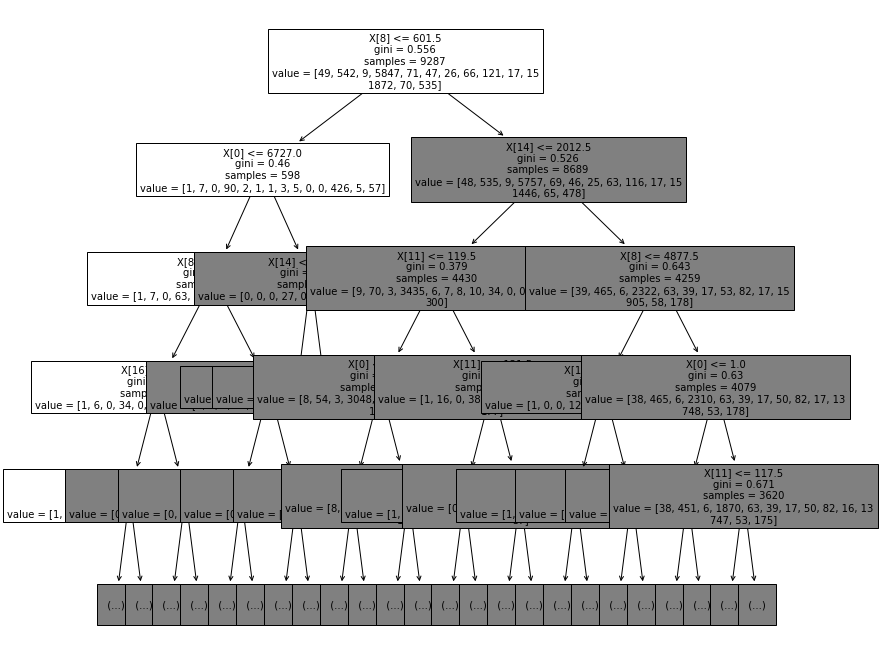

In [ ]:
clf = tree.DecisionTreeClassifier()
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf.fit(X, Y), max_depth=4, fontsize=10)
plt.show()

In [ ]:
data_feature_names=['source_link','location_description','location_accuracy','landslide_category','landslide_size','fatality_count','injury_count','event_import_source','event_import_id','admin_division_name','admin_division_population','longitude','latitude','Country_Name','event_year','event_month','event_week','event_day','event_date_hour','event_date_minute','landslide_size']

In [ ]:
import pydotplus
import collections

In [ ]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('/content/drive/My Drive/NASA Challenge/FINAL NASA ALL/tree.pdf')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.14689 to fit



True